In [3]:
import json
import pandas as pd
import copy
import random
import numpy as np
import distutils.dir_util
import io
import os

In [13]:
df = pd.read_json('./origin_data_modify/train_mod7.json', typ='frame')
df.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,songs_cnt
0,[팝],50564,1 HITS OF DECADE SPECIAL 2,"[60025, 326802, 82991, 533287, 132109, 298235,...",5,2009-07-11 21:37:42.000,25
1,[기분좋은],148495,100번 들어도 기분좋은 가요,"[208186, 155952, 669617, 438439, 397412, 60398...",4,2016-10-31 13:59:41.000,14
2,"[겨울, 크리스마스]",117162,12월의 재즈,"[407630, 235568, 352044, 294512, 309377, 17965...",353,2016-12-26 12:33:33.000,8
3,[발라드],151638,12월의 크리스마스를 yeah,"[290351, 404382, 18938, 676958, 374448, 62388,...",29,2009-12-22 09:11:45.000,29
4,[일렉],27984,1월의 최신 EDM 소식,"[34851, 596152, 650671, 16261]",84,2015-01-29 16:22:19.000,4


In [14]:
df = df.iloc[:, :6]
df.head()

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[팝],50564,1 HITS OF DECADE SPECIAL 2,"[60025, 326802, 82991, 533287, 132109, 298235,...",5,2009-07-11 21:37:42.000
1,[기분좋은],148495,100번 들어도 기분좋은 가요,"[208186, 155952, 669617, 438439, 397412, 60398...",4,2016-10-31 13:59:41.000
2,"[겨울, 크리스마스]",117162,12월의 재즈,"[407630, 235568, 352044, 294512, 309377, 17965...",353,2016-12-26 12:33:33.000
3,[발라드],151638,12월의 크리스마스를 yeah,"[290351, 404382, 18938, 676958, 374448, 62388,...",29,2009-12-22 09:11:45.000
4,[일렉],27984,1월의 최신 EDM 소식,"[34851, 596152, 650671, 16261]",84,2015-01-29 16:22:19.000


In [15]:
df.to_json('train_0928.json', orient='records')

In [16]:
def write_json(data, fname):
    def _conv(o):
        if isinstance(o, (np.int64, np.int32)):
            return int(o)
        raise TypeError

    parent = os.path.dirname(fname)
    distutils.dir_util.mkpath(parent)
    with io.open(fname, "w", encoding="utf-8") as f:
        json_str = json.dumps(data, ensure_ascii=False, default=_conv)
        f.write(json_str)

def load_json(fname):
    with open(fname, encoding='utf-8') as f:
        json_obj = json.load(f)

    return json_obj

In [17]:
loda_train = load_json('./train_0928.json')

In [18]:
len(loda_train)

76309

In [19]:
loda_train

[{'tags': ['팝'],
  'id': 50564,
  'plylst_title': '1 HITS OF DECADE SPECIAL 2',
  'songs': [60025,
   326802,
   82991,
   533287,
   132109,
   298235,
   260221,
   123794,
   331848,
   182427,
   194748,
   37298,
   355235,
   286516,
   280683,
   615668,
   114522,
   364981,
   249923,
   316387,
   321409,
   89965,
   6901,
   658393,
   229337],
  'like_cnt': 5,
  'updt_date': '2009-07-11 21:37:42.000'},
 {'tags': ['기분좋은'],
  'id': 148495,
  'plylst_title': '100번 들어도 기분좋은 가요',
  'songs': [208186,
   155952,
   669617,
   438439,
   397412,
   603987,
   387621,
   165434,
   135925,
   420396,
   561455,
   418859,
   684625,
   202504],
  'like_cnt': 4,
  'updt_date': '2016-10-31 13:59:41.000'},
 {'tags': ['겨울', '크리스마스'],
  'id': 117162,
  'plylst_title': '12월의 재즈',
  'songs': [407630, 235568, 352044, 294512, 309377, 179652, 473793, 677632],
  'like_cnt': 353,
  'updt_date': '2016-12-26 12:33:33.000'},
 {'tags': ['발라드'],
  'id': 151638,
  'plylst_title': '12월의 크리스마스를 yeah',

- 박스플롯

In [20]:
df = pd.read_json('./train_0928.json', typ='frame')
df.head()

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[팝],50564,1 HITS OF DECADE SPECIAL 2,"[60025, 326802, 82991, 533287, 132109, 298235,...",5,2009-07-11 21:37:42.000
1,[기분좋은],148495,100번 들어도 기분좋은 가요,"[208186, 155952, 669617, 438439, 397412, 60398...",4,2016-10-31 13:59:41.000
2,"[겨울, 크리스마스]",117162,12월의 재즈,"[407630, 235568, 352044, 294512, 309377, 17965...",353,2016-12-26 12:33:33.000
3,[발라드],151638,12월의 크리스마스를 yeah,"[290351, 404382, 18938, 676958, 374448, 62388,...",29,2009-12-22 09:11:45.000
4,[일렉],27984,1월의 최신 EDM 소식,"[34851, 596152, 650671, 16261]",84,2015-01-29 16:22:19.000


In [21]:
import matplotlib.pyplot as plt

In [30]:
df_tags = df.explode('tags')['tags'].reset_index()
df_tags = df_tags.groupby('tags').count().reset_index()
df_tags = df_tags.rename(columns={'index':'tags_cnt'})
df_tags

,tags,tags_cnt
0,00년대,15
1,0살,2
2,1,12
3,100곡,7
4,10cm,14
...,...,...
3415,힙합엘이,52
3416,힙합음악,7
3417,힙합추천,7
3418,힙합클럽,47


In [35]:
df_songs['songs_cnt'].describe()

count    44689.000000
mean        41.837298
std         62.247563
min         10.000000
25%         14.000000
50%         22.000000
75%         41.000000
max       1291.000000
Name: songs_cnt, dtype: float64

In [34]:
df_tags['tags_cnt'].describe()

count     3420.000000
mean        89.132164
std        496.040365
min          1.000000
25%          7.000000
50%         12.000000
75%         31.000000
max      11467.000000
Name: tags_cnt, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a66f8df150>,
 'caps': [<matplotlib.lines.Line2D at 0x1a66e182b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a66e190210>],
 'medians': [<matplotlib.lines.Line2D at 0x1a66fa74410>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a66fa74c90>],
 'means': []}

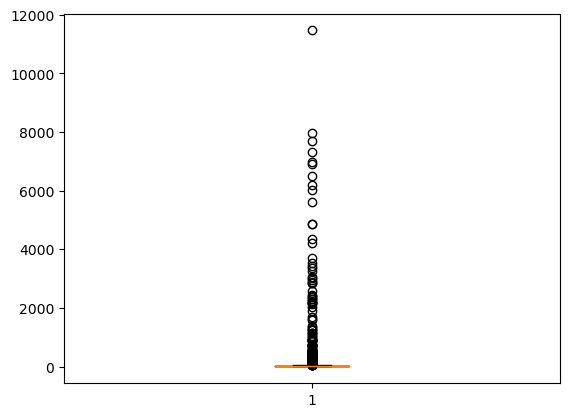

In [31]:
plt.boxplot(df_tags['tags_cnt'])

In [32]:
df_songs = df.explode('songs')['songs'].reset_index()
df_songs = df_songs.groupby('songs').count().reset_index()
df_songs = df_songs.rename(columns={'index':'songs_cnt'})
df_songs

,songs,songs_cnt
0,10,21
1,19,18
2,30,34
3,47,17
4,54,71
...,...,...
44684,707903,12
44685,707913,52
44686,707927,17
44687,707965,19


{'whiskers': [<matplotlib.lines.Line2D at 0x1a66fc6c490>,
 'caps': [<matplotlib.lines.Line2D at 0x1a66fc6ded0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a66fc576d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a66fc6f2d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a66fc6fe50>],
 'means': []}

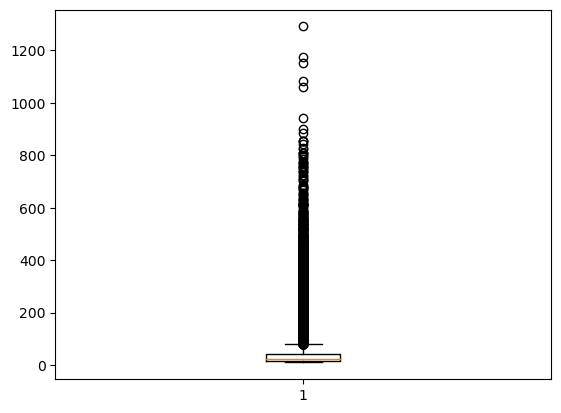

In [33]:
plt.boxplot(df_songs['songs_cnt'])

In [36]:
df['song_in_ply_cnt'] = df['songs'].apply(len)
df.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,song_in_ply_cnt
0,[팝],50564,1 HITS OF DECADE SPECIAL 2,"[60025, 326802, 82991, 533287, 132109, 298235,...",5,2009-07-11 21:37:42.000,25
1,[기분좋은],148495,100번 들어도 기분좋은 가요,"[208186, 155952, 669617, 438439, 397412, 60398...",4,2016-10-31 13:59:41.000,14
2,"[겨울, 크리스마스]",117162,12월의 재즈,"[407630, 235568, 352044, 294512, 309377, 17965...",353,2016-12-26 12:33:33.000,8
3,[발라드],151638,12월의 크리스마스를 yeah,"[290351, 404382, 18938, 676958, 374448, 62388,...",29,2009-12-22 09:11:45.000,29
4,[일렉],27984,1월의 최신 EDM 소식,"[34851, 596152, 650671, 16261]",84,2015-01-29 16:22:19.000,4


{'whiskers': [<matplotlib.lines.Line2D at 0x1a66fd4cb90>,
 'caps': [<matplotlib.lines.Line2D at 0x1a66fd4e890>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a66fd3ffd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a66fd4fc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a66fd60810>],
 'means': []}

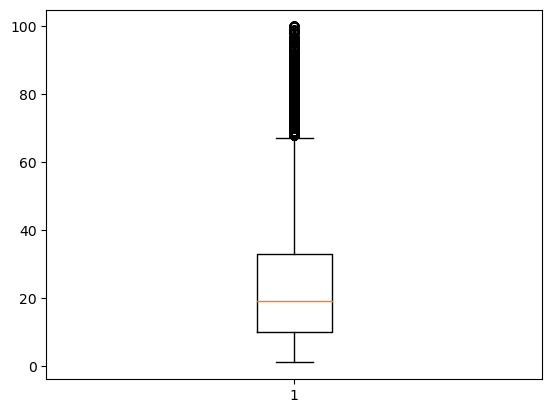

In [37]:
plt.boxplot(df['song_in_ply_cnt'])